# MIDTERM

# importing requried pacakages

In [85]:
import praw
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# AUTHENTICATE

In [86]:

# Initialize Reddit instance
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="auBhsYmJ2nG356ZE43ZQKQ",
    client_secret="qRGQ1E9A3Z6DL9PCcsFozRvwNmPmfw",
    user_agent=user_agent
)

# SUBREDDIT

In [ ]:
# Hot new rising topics
headlines = set()
for submission in reddit.subreddit("nutrition").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.name)# full name of submission
    print(submission.subreddit)# provides an instance of subreddit
    print(submission.num_comments)# number of comments of submission
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

In [87]:
headlines = set()
for submission in reddit.subreddit("nutrition").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

453


In [88]:
#Create a dataframe from the scrapped data 
nutrition_df = pd.DataFrame(headlines)
nutrition_df.head()

,0
0,Which creatine is best for stomach issues (e.g...
1,How bad is margarine?
2,I understand the consensus that processed meat...
3,Does hummus have a lot of good fat?
4,hoe to prepare (how hot can it get before degr...


In [89]:
nutrition_df.columns = ['Titles']

In [90]:
nutrition_df.head()

,Titles
0,Which creatine is best for stomach issues (e.g...
1,How bad is margarine?
2,I understand the consensus that processed meat...
3,Does hummus have a lot of good fat?
4,hoe to prepare (how hot can it get before degr...


# APPLYING REGEX AND STOP WORDS REMOVAL

In [91]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
nutrition_df["Titles"]= nutrition_df["Titles"].apply(cleanTxt)

#Show the clean text
nutrition_df.head()

,Titles
0,Which creatine is best for stomach issues (e.g...
1,How bad is margarine?
2,I understand the consensus that processed meat...
3,Does hummus have a lot of good fat?
4,hoe to prepare (how hot can it get before degr...


# REMOVING EMOJIS 

In [92]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
nutrition_df["Titles"]= nutrition_df["Titles"].apply(remove_emoji)

#Show the clean text
nutrition_df.head()

,Titles
0,Which creatine is best for stomach issues (e.g...
1,How bad is margarine?
2,I understand the consensus that processed meat...
3,Does hummus have a lot of good fat?
4,hoe to prepare (how hot can it get before degr...


# REGEX

In [113]:
import regex as re # importing and using regex for  matching and extracting string patterns

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [114]:
testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov"
testtokens = tokenize(testtext)
 
print(testtokens)


['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in', 'www', 'cdc', 'gov']


# STOP WORDS

In [ ]:
import nltk # importing Natural Language Toolkit for  which helps in tokenization..
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)


In [116]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
#Just testing it
cleantokens= remove_stop(testtokens)
print(cleantokens)


['Let', 'defeat', 'SARS-CoV-2', 'together', 'www', 'cdc', 'gov']


# PIPLEINES

In [ ]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


In [120]:
nutrition_df['tokens'] = nutrition_df['Titles'].apply(prepare, pipeline=pipeline)


In [122]:
nutrition_df['num_tokens'] = nutrition_df['tokens'].map(len)
nutrition_df.tail()
# returns last rows

,Titles,Tokens,tokens,num_tokens
448,Why does the DASH diet recommend so few nuts a...,"[Why, does, the, DASH, diet, recommend, so, fe...","[dash, diet, recommend, nuts, seeds]",5
449,How do people get the RDA 1500mg of calcium?,"[How, do, people, get, the, RDA, 1500mg, of, c...","[people, get, rda, 1500mg, calcium]",5
450,Omega supplement such as Sport Research Total ...,"[Omega, supplement, such, as, Sport, Research,...","[omega, supplement, sport, research, total, om...",19
451,What are some common ingredients that you shou...,"[What, are, some, common, ingredients, that, y...","[common, ingredients, generally, avoid]",4
452,Are lemons and limes considered acid or alkaline?,"[Are, lemons, and, limes, considered, acid, or...","[lemons, limes, considered, acid, alkaline]",5


In [94]:
nutrition_df['length']=nutrition_df['Titles'].str.len()
nutrition_df.describe()

,length
count,453.000000
mean,52.467991
std,33.275027
min,15.000000
25%,29.000000
50%,43.000000
75%,65.000000
max,200.000000


# statistical operations

In [97]:
# Mean length of titles
nutrition_df['Length'] = nutrition_df['Titles'].str.len()
mean_length = nutrition_df['Length'].mean()
print("Mean length of titles:", mean_length)

Mean length of titles: 52.46799116997793


In [98]:

nutrition_df['Length'] = nutrition_df['Titles'].str.len()
# Median length of titles
median_length = nutrition_df['Length'].median()
print("Median length of titles:", median_length)

Median length of titles: 43.0


In [99]:
# Standard deviation of title lengths
nutrition_df['Length'] = nutrition_df['Titles'].str.len()
std_dev_length = nutrition_df['Length'].std()
print("Standard deviation of title lengths:", std_dev_length)

Standard deviation of title lengths: 33.27502670730113


In [100]:
# Minimum and maximum length of titles
nutrition_df['Length'] = nutrition_df['Titles'].str.len()
min_length = nutrition_df['Length'].min()
max_length = nutrition_df['Length'].max()
print("Minimum length of titles:", min_length)
print("Maximum length of titles:", max_length)

Minimum length of titles: 15
Maximum length of titles: 200


# PLOTTING

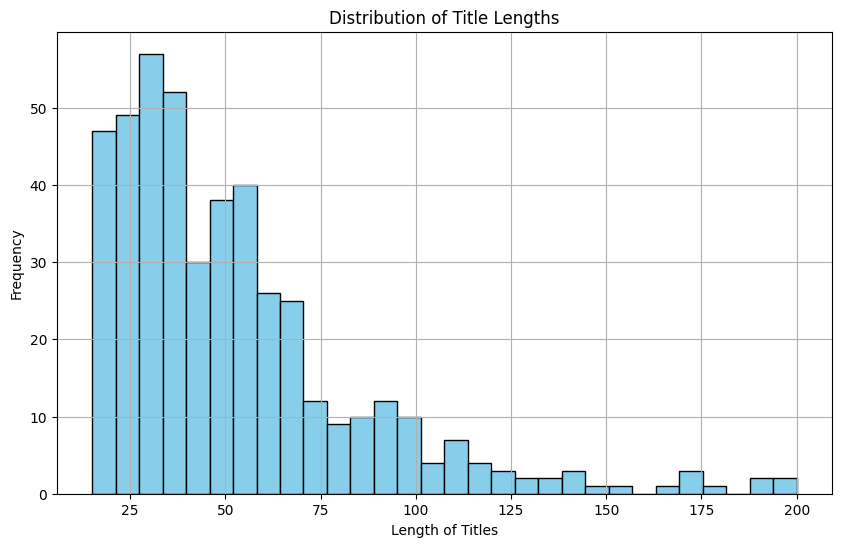

In [101]:
import matplotlib.pyplot as plt

# Create a histogram of title lengths
plt.figure(figsize=(10, 6))
plt.hist(nutrition_df['Length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Title Lengths')
plt.xlabel('Length of Titles')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

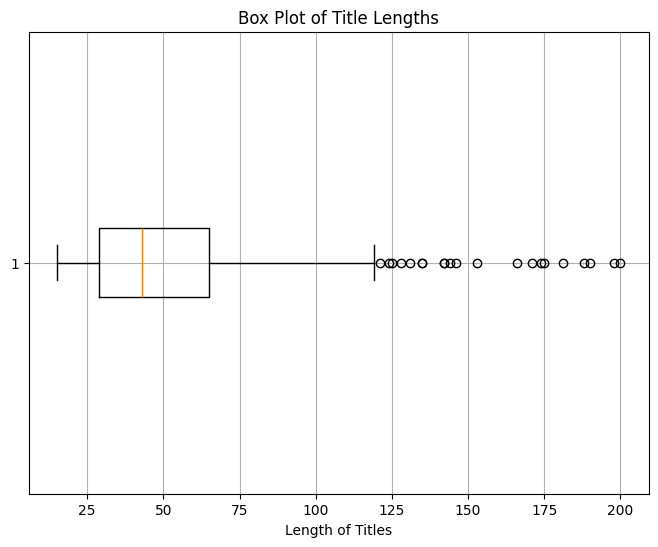

In [102]:
import matplotlib.pyplot as plt
# Create a box plot of title lengths
plt.figure(figsize=(8, 6))
plt.boxplot(nutrition_df['Length'], vert=False)
plt.title('Box Plot of Title Lengths')
plt.xlabel('Length of Titles')
plt.grid(True)
plt.show()

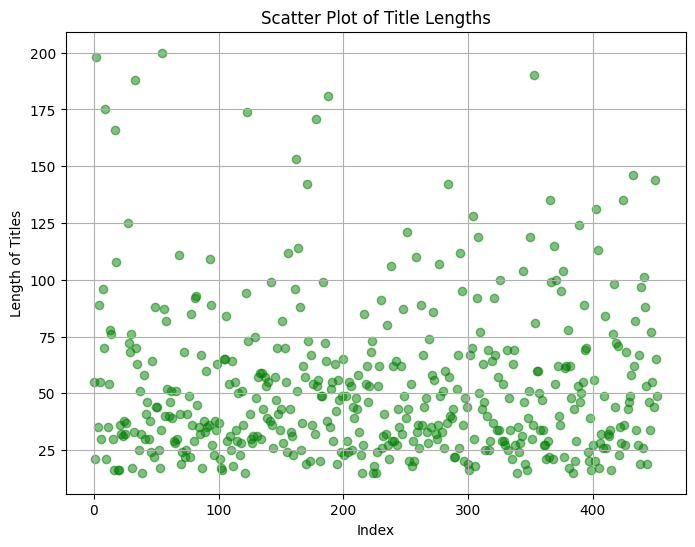

In [103]:
import matplotlib.pyplot as plt
# Create a scatter plot of title lengths
plt.figure(figsize=(8, 6))
plt.scatter(nutrition_df.index, nutrition_df['Length'], color='green', alpha=0.5)
plt.title('Scatter Plot of Title Lengths')
plt.xlabel('Index')
plt.ylabel('Length of Titles')
plt.grid(True)
plt.show()

# WORD FREQUENCY

In [ ]:
from collections import Counter # importing counter to count variables

tokens = tokenize("She likes my cats and my cats like my sofa.")

testcount= Counter(tokens)
print(testcount)


In [134]:
more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens)
print(testcount)


Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


# wordcloud

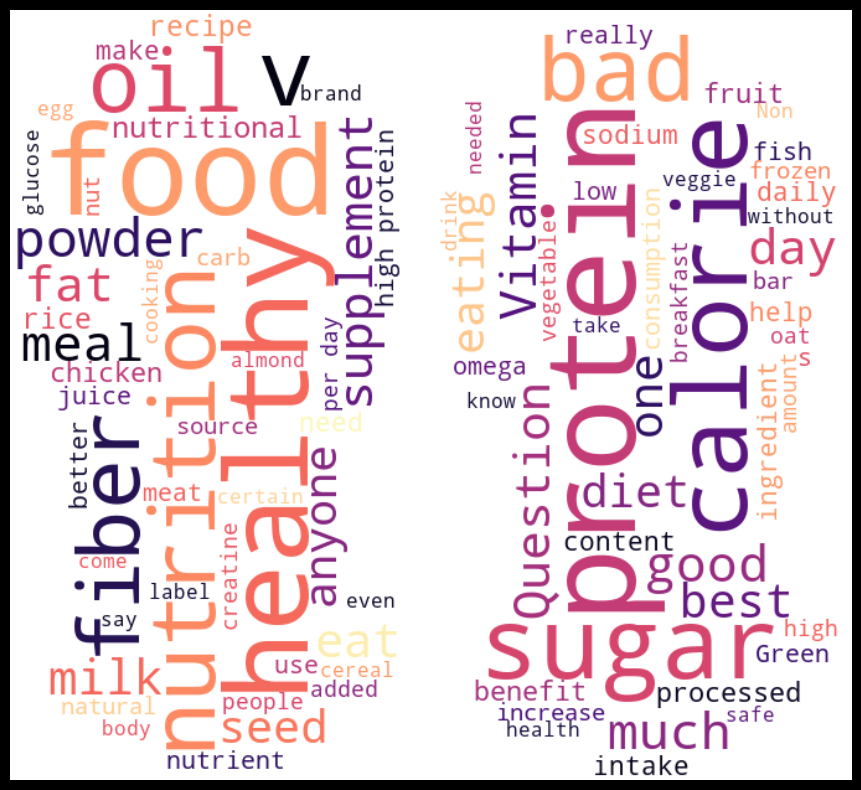

In [142]:
from PIL import Image
import numpy as np

text = ' '.join( [twts for twts in nutrition_df['Titles']] ) 

image = Image.open('human.jpg')
mask = np.array(image)

max_font_size = 100
min_font_size = 15

wordcloud = WordCloud(width=1000, 
                      height = 600,
                      max_words = 100,
                      mask = mask,
                      colormap = 'magma',
                      max_font_size = max_font_size,
                      min_font_size = min_font_size,
                      background_color = "white").generate(text)

# Display the generated image:

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
plt.show();

# SENTIMENT ANALYSIS

In [143]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [145]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df datafram
nutrition_df['Subjectivity'] = nutrition_df['Titles'].apply(getSubjectivity)
nutrition_df['Polarity'] = nutrition_df['Titles'].apply(getPolarity)

#Now display data
nutrition_df.head()

,Titles,Tokens,Subjectivity,Polarity
0,Which creatine is best for stomach issues (e.g...,"[Which, creatine, is, best, for, stomach, issu...",0.300000,1.000000
1,How bad is margarine?,"[How, bad, is, margarine, ?]",0.666667,-0.700000
2,I understand the consensus that processed meat...,"[I, understand, the, consensus, that, processe...",0.510952,-0.187143
3,Does hummus have a lot of good fat?,"[Does, hummus, have, a, lot, of, good, fat, ?]",0.600000,0.700000
4,hoe to prepare (how hot can it get before degr...,"[hoe, to, prepare, (, how, hot, can, it, get, ...",0.850000,0.250000


In [146]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
nutrition_df["Insight"] = nutrition_df["Polarity"].apply(getInsight)

nutrition_df.head(50)

,Titles,Tokens,Subjectivity,Polarity,Insight
0,Which creatine is best for stomach issues (e.g...,"[Which, creatine, is, best, for, stomach, issu...",0.300000,1.000000,Positive
1,How bad is margarine?,"[How, bad, is, margarine, ?]",0.666667,-0.700000,Negative
2,I understand the consensus that processed meat...,"[I, understand, the, consensus, that, processe...",0.510952,-0.187143,Negative
3,Does hummus have a lot of good fat?,"[Does, hummus, have, a, lot, of, good, fat, ?]",0.600000,0.700000,Positive
4,hoe to prepare (how hot can it get before degr...,"[hoe, to, prepare, (, how, hot, can, it, get, ...",0.850000,0.250000,Positive
5,How the hell does one achieve a good zinc/copp...,"[How, the, hell, does, one, achieve, a, good, ...",0.600000,0.700000,Positive
6,What are sources of trans-fat?,"[What, are, sources, of, trans-fat, ?]",0.000000,0.000000,Neutral
7,We had a dog food rep come talk to use today a...,"[We, had, a, dog, food, rep, come, talk, to, u...",0.400000,0.100000,Positive
8,"Is an Everyday, Every Meal Simple Bowl of Comp...","[Is, an, Everyday, ,, Every, Meal, Simple, Bow...",0.589286,-0.025000,Negative
9,We have been blaming a lot of health issues on...,"[We, have, been, blaming, a, lot, of, health, ...",0.600000,-0.400000,Negative


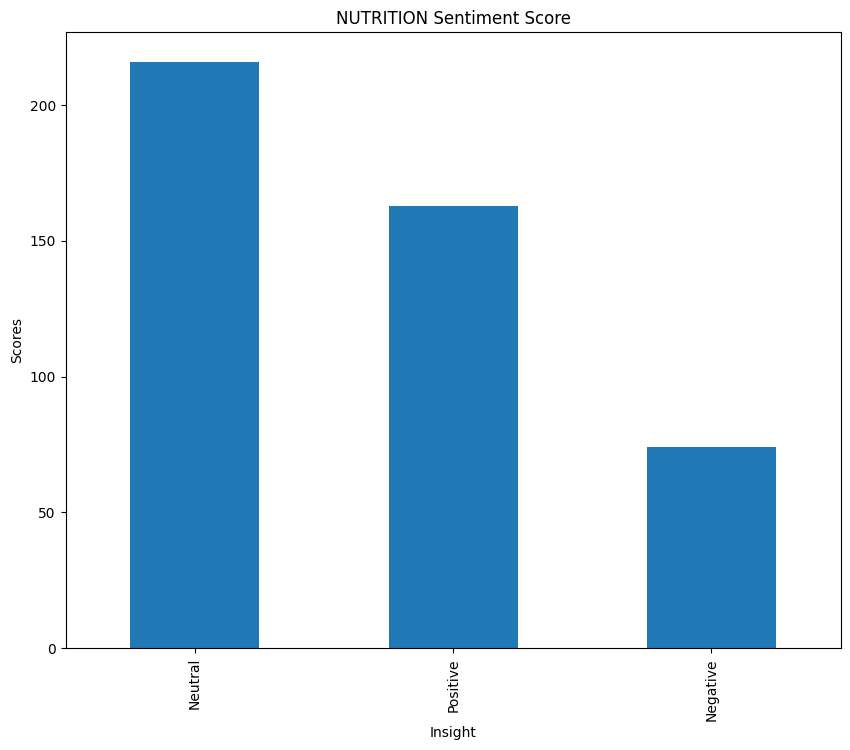

In [159]:
#Plot the values count of sentiment
plt.title("NUTRITION Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
nutrition_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# BING-LIU

In [149]:
from sklearn import preprocessing
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',
      opinion_lexicon.positive()[:10])
print('Examples of negative words in opinion lexicon',
      opinion_lexicon.negative()[:10])


Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\laxmi\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [151]:
# Let's create a dictionary which we can use for scoring our review text
nltk.download('punkt')
nutrition_df.rename(columns={"Titles": "text"}, inplace=True)
pos_score = 1
neg_score = -1
word_dict = {}
 
# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
        word_dict[word] = pos_score
      
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
        word_dict[word] = neg_score


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laxmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [152]:
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score  


In [154]:

nutrition_df['text'] =nutrition_df['text'].fillna('no review')

nutrition_df['Bing_Liu_Score'] = nutrition_df['text'].apply(bing_liu_score)

In [156]:
nutrition_df[['Tokens',"text", 'Bing_Liu_Score']].head(10)

,Tokens,text,Bing_Liu_Score
0,"[Which, creatine, is, best, for, stomach, issu...",Which creatine is best for stomach issues (e.g...,0
1,"[How, bad, is, margarine, ?]",How bad is margarine?,-1
2,"[I, understand, the, consensus, that, processe...",I understand the consensus that processed meat...,-2
3,"[Does, hummus, have, a, lot, of, good, fat, ?]",Does hummus have a lot of good fat?,0
4,"[hoe, to, prepare, (, how, hot, can, it, get, ...",hoe to prepare (how hot can it get before degr...,0
5,"[How, the, hell, does, one, achieve, a, good, ...",How the hell does one achieve a good zinc/copp...,0
6,"[What, are, sources, of, trans-fat, ?]",What are sources of trans-fat?,0
7,"[We, had, a, dog, food, rep, come, talk, to, u...",We had a dog food rep come talk to use today a...,0
8,"[Is, an, Everyday, ,, Every, Meal, Simple, Bow...","Is an Everyday, Every Meal Simple Bowl of Comp...",0
9,"[We, have, been, blaming, a, lot, of, health, ...",We have been blaming a lot of health issues on...,-4
